# Case Study - Wine Quality Prediction

# Context
This datasets is related to red variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) 
variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are 
much more normal wines than excellent or poor ones).

# Dataset:
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality 

# Problem Statement:
    
Wine Quality Prediction- Here, we will apply a method of assessing wine quality using a decision tree, and test it against the 
wine-quality dataset from the UC Irvine Machine Learning Repository.
The wine dataset is a classic and very easy multi-class classification dataset.

## Number of Instances: red wine - 1599; white wine - 4898. 

## Attribute information:
  - Input variables (based on physicochemical tests):
      1. fixed acidity (tartaric acid - g / dm^3)
      2. volatile acidity (acetic acid - g / dm^3)
      3. citric acid (g / dm^3)
      4. residual sugar (g / dm^3)
      5. chlorides (sodium chloride - g / dm^3
      6. free sulfur dioxide (mg / dm^3)
      7. total sulfur dioxide (mg / dm^3)
      8. density (g / cm^3)
      9. pH
      10. sulphates (potassium sulphate - g / dm3)
      11. alcohol (% by volume)
  - Output variable (based on sensory data): 
      - quality (score between 0 and 10)

## Missing Attribute Values: None

### Description of attributes:

   1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

   2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

   3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

   4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

   5 - chlorides: the amount of salt in the wine

   6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

   7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

   8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

   9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

   10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

   11 - alcohol: the percent alcohol content of the wine

   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)


# Import all necessary modules and load the data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

In [2]:
wine_df = pd.read_csv('winequality-red.csv',sep=';')

# Print 10 samples from the dataset

In [3]:
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
wine_df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number 
of attributes, types of attributes and a general idea of likely challenges in the dataset.

# Print the datatypes of each column and the shape of the dataset

In [5]:
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
wine_df.shape

(1599, 12)

In [7]:
# Check for Missing Values
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

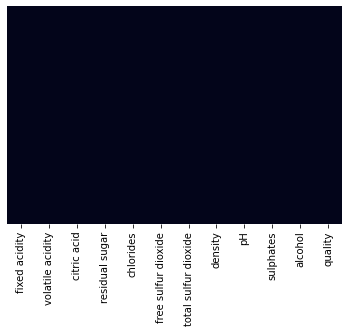

In [8]:
# Plot to check for Missing Values
sns.heatmap(wine_df.isnull(),yticklabels=False,cbar=False)

# Print the descriptive statistics of each & every column using describe() function

In [9]:
wine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [10]:
# Not take into account skew as we decide on running Decision Tree Model only
wine_df.skew().sort_values(ascending=False)

chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
volatile acidity        0.671593
citric acid             0.318337
quality                 0.217802
pH                      0.193683
density                 0.071288
dtype: float64

In [11]:
wine_df.kurt().sort_values(ascending=False)

chlorides               41.715787
residual sugar          28.617595
sulphates               11.720251
total sulfur dioxide     3.809824
free sulfur dioxide      2.023562
volatile acidity         1.225542
fixed acidity            1.132143
density                  0.934079
pH                       0.806943
quality                  0.296708
alcohol                  0.200029
citric acid             -0.788998
dtype: float64

# Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc.
What are your observations (any two attributes).

In [12]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

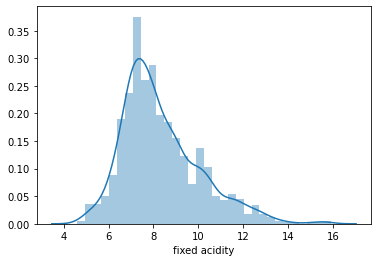

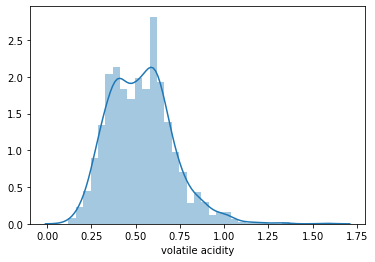

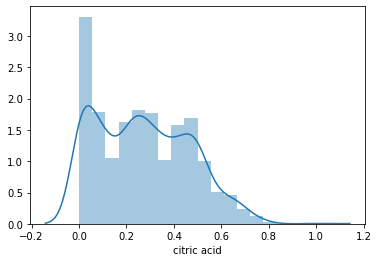

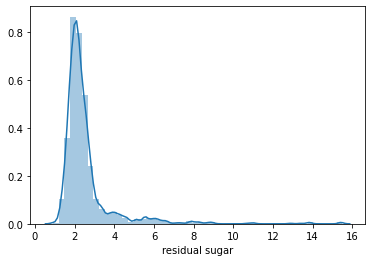

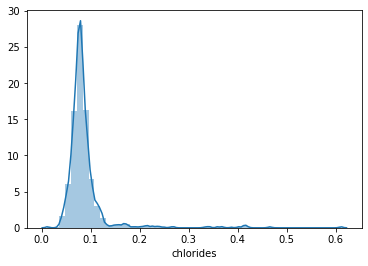

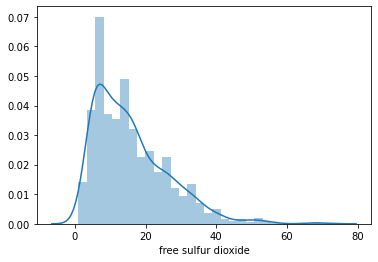

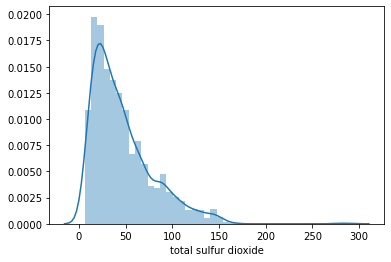

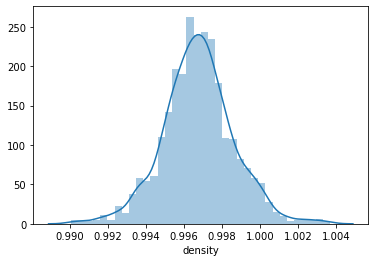

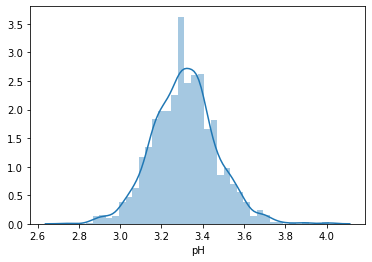

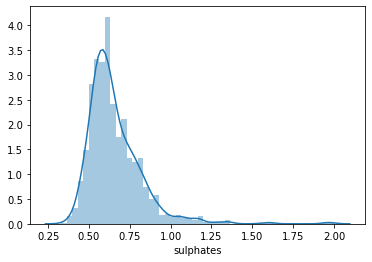

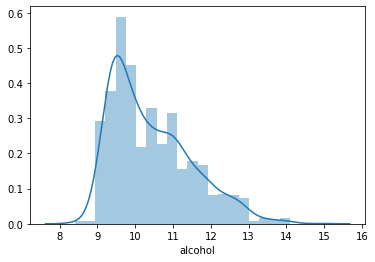

In [13]:
for i in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']:
    sns.distplot(wine_df[i])
    plt.show()
# No need to do log transform here as we dont need gaussian assumption for Decision Trees

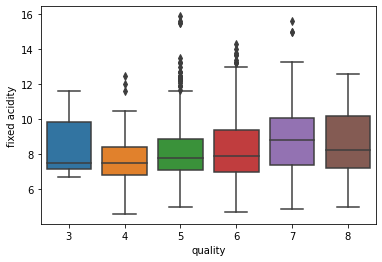

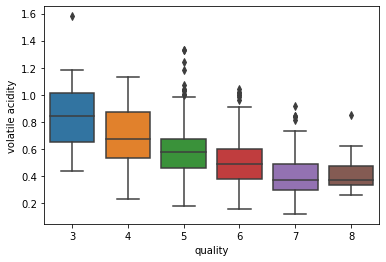

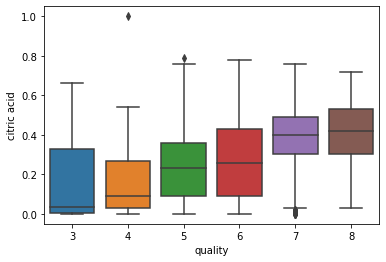

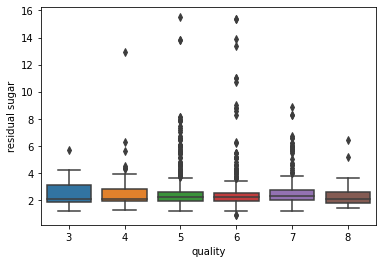

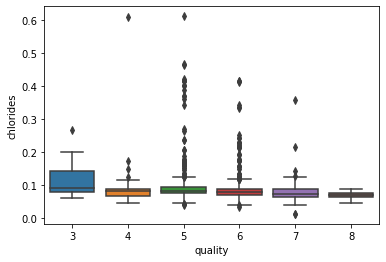

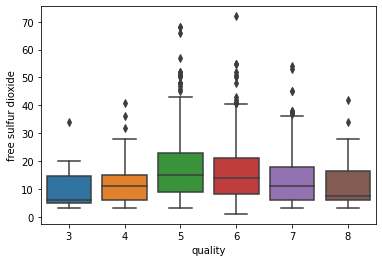

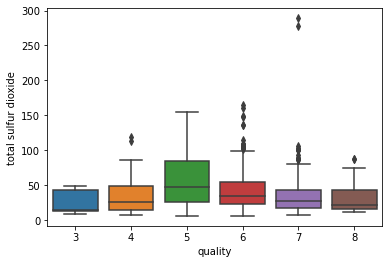

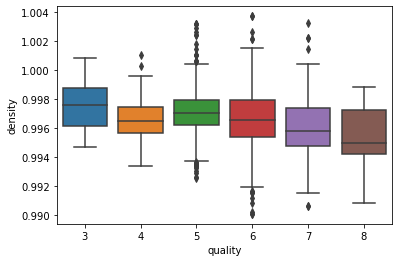

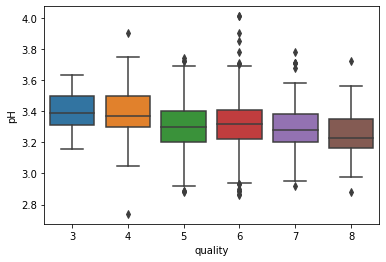

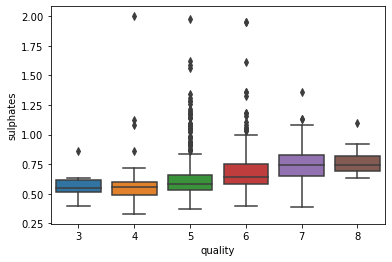

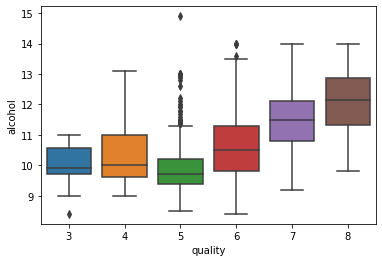

In [14]:
for i in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']:
    sns.boxplot(x='quality',y=i,data=wine_df)
    plt.show()

#2 Alcohol and volatile acidity look interesting

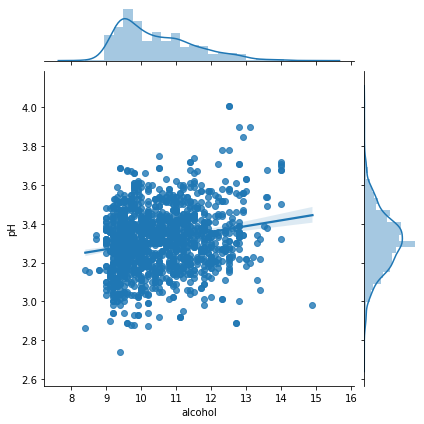

In [15]:
sns.jointplot(x='alcohol',y='pH',data=wine_df,kind='reg')
# Discussed collinearity - it doesnt impact Decision tree model but be cautious while interpretation of the model

In [16]:
#Combine 7&8 together; combine 3 and 4 with 5 so that we have only 3 levels and a more balanced Y variable
wine_df['quality_orig'] = wine_df['quality']
wine_df['quality'] = wine_df['quality'].replace(8,7)
wine_df['quality'] = wine_df['quality'].replace(3,5)
wine_df['quality'] = wine_df['quality'].replace(4,5)
wine_df['quality'].value_counts()

5    744
6    638
7    217
Name: quality, dtype: int64

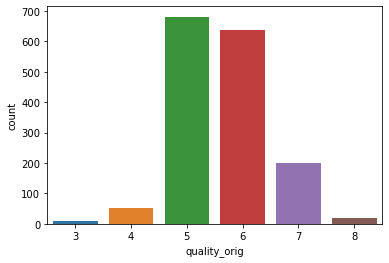

In [17]:
sns.countplot(wine_df['quality_orig'])
#Class Imbalanced Issue

In [18]:
wine_df['quality_orig'].value_counts().sort_index()                                     # normalize = True

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality_orig, dtype: int64

In [19]:
# Solved Class Imbalanced problem by combining classes together
wine_df['quality'].value_counts(normalize = True).sort_index() 

5    0.465291
6    0.398999
7    0.135710
Name: quality, dtype: float64

In [20]:
wine_df['quality'].value_counts().sort_index()    

5    744
6    638
7    217
Name: quality, dtype: int64

# Use correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables

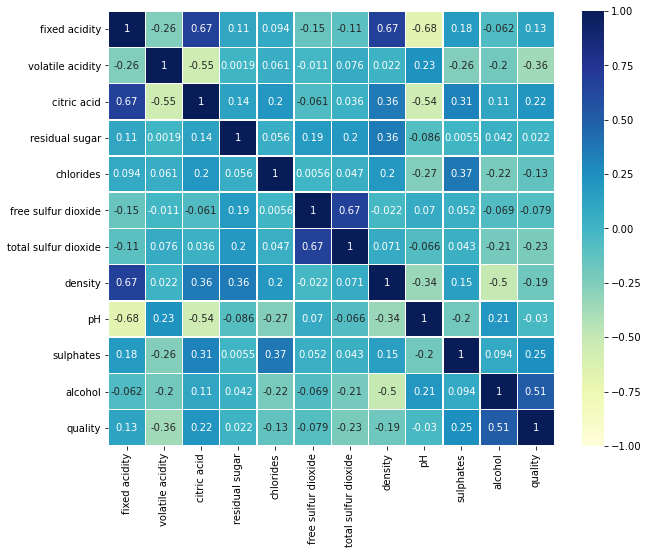

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(wine_df.drop("quality_orig",axis=1).corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=True,
            cmap="YlGnBu",
            vmin=-1,
            vmax=+1)
plt.show()


In [22]:
df = wine_df.corr()
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_orig'],
      dtype='object')

In [23]:
# Find interesting correlations only
df[((df > 0.6) & (df < 1)) | (df < -0.6) ].dropna(how='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_orig
fixed acidity,NaN,NaN,0.671703,NaN,NaN,NaN,NaN,0.668047,-0.682978,NaN,NaN,NaN,NaN
citric acid,0.671703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,0.667666,NaN,NaN,NaN,NaN,NaN,NaN
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,0.667666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
density,0.668047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pH,-0.682978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.94962
quality_orig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.94962,NaN


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


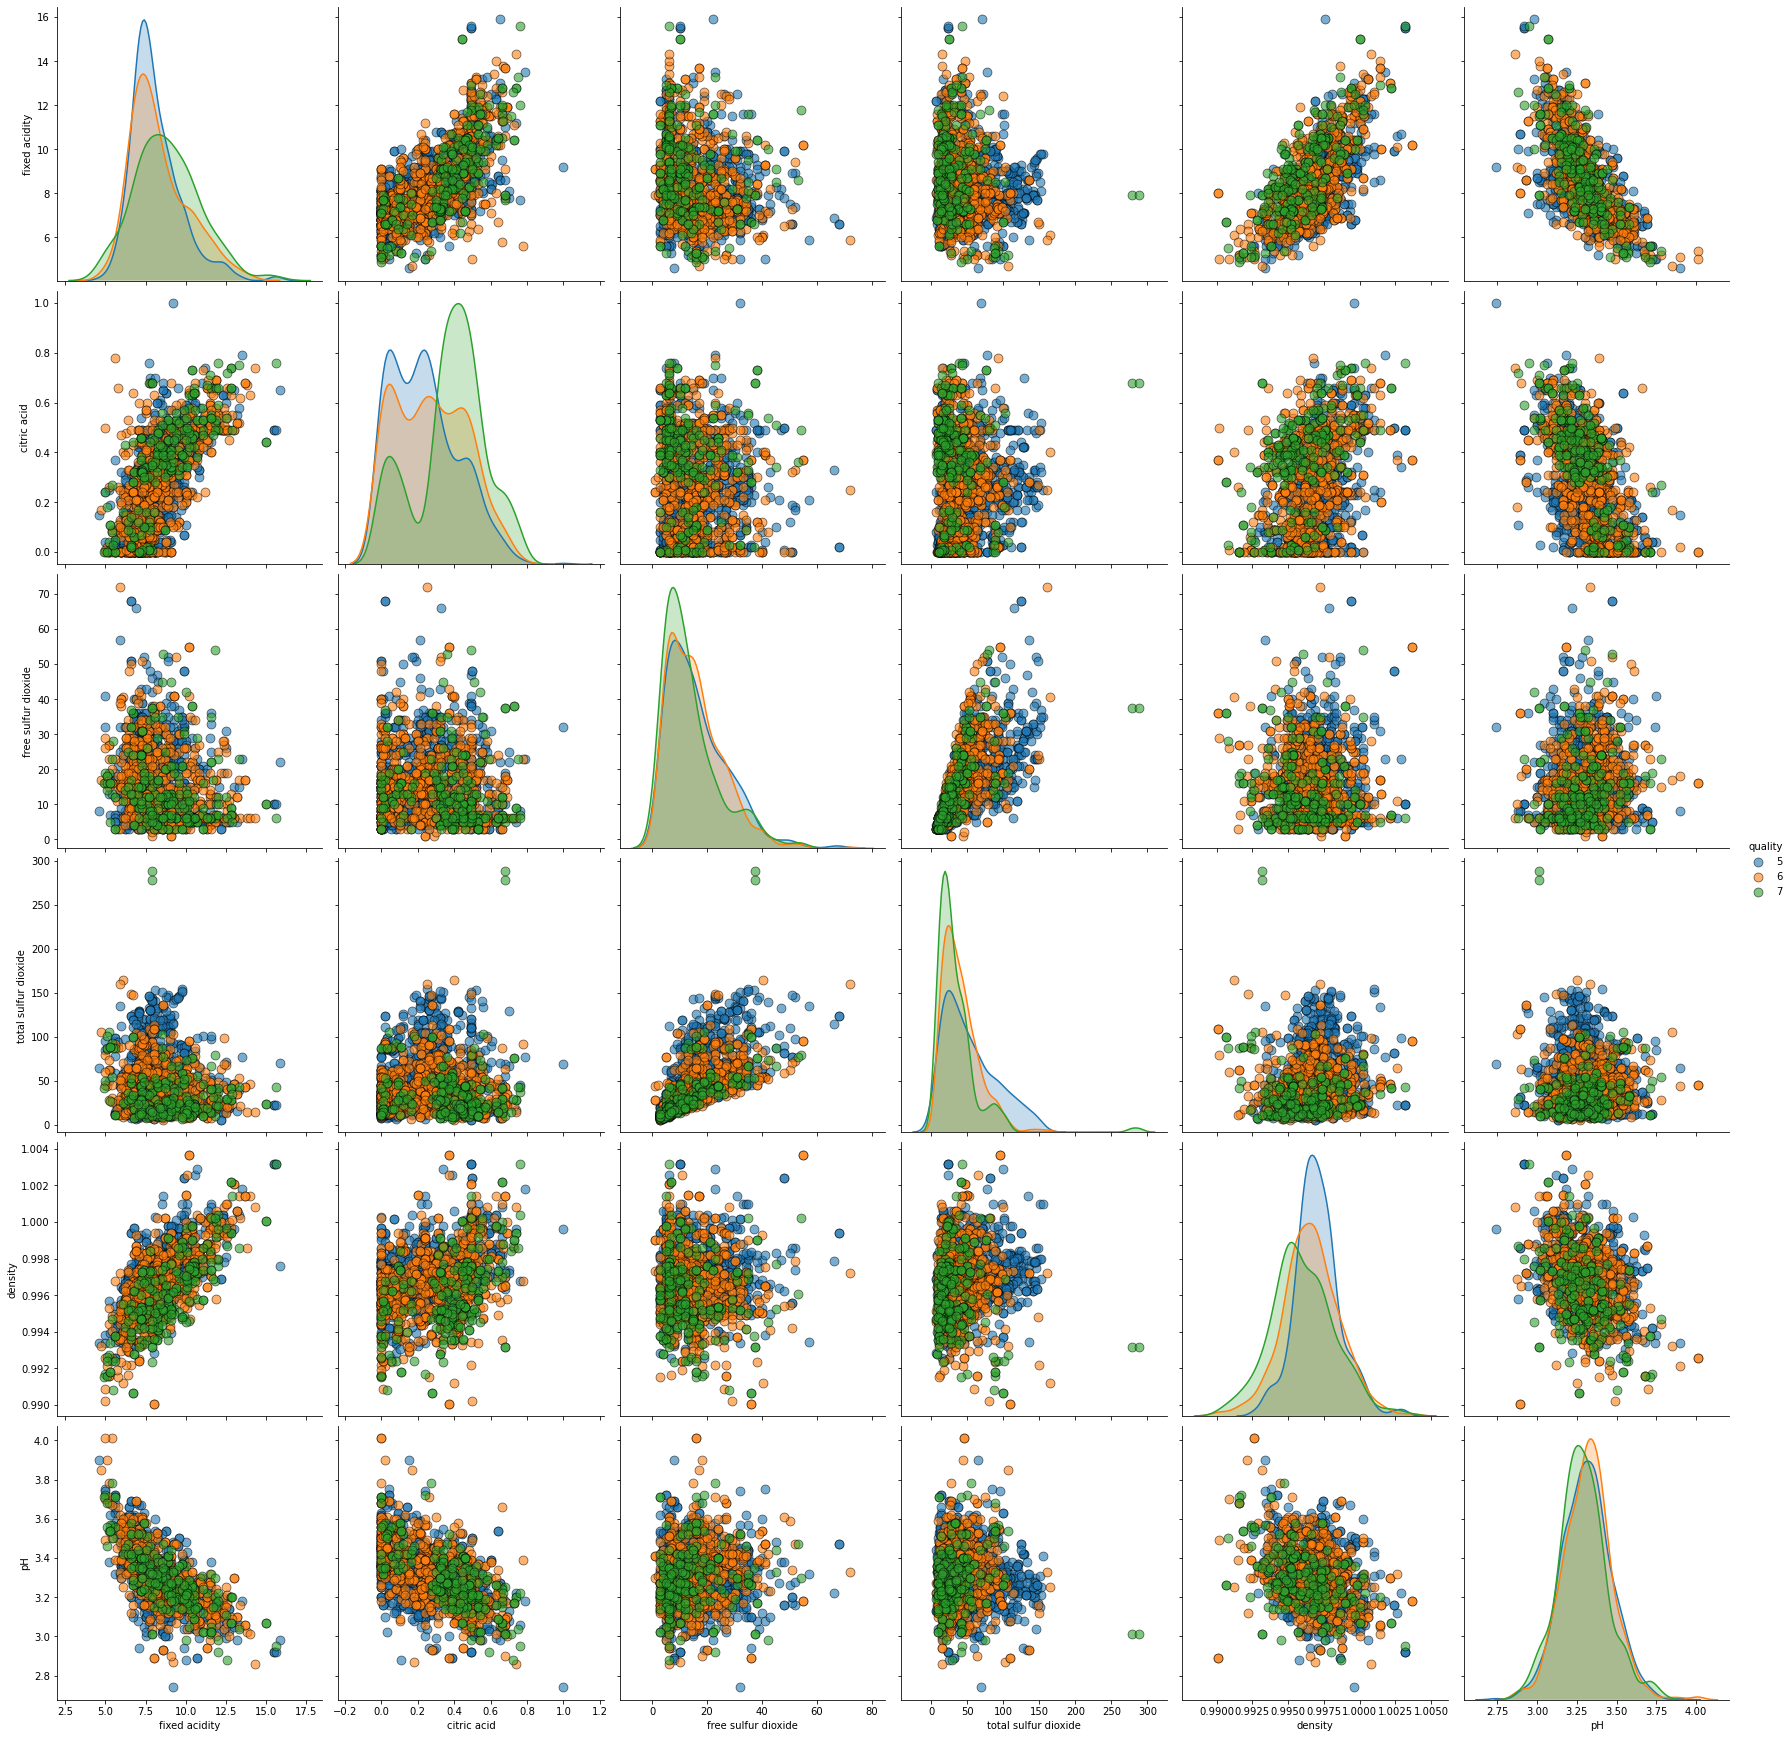

In [24]:
# Use pair plots on only variables with interesting correlations only
sns.pairplot(wine_df,hue='quality',diag_kind ='kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4,vars = ['fixed acidity', 'citric acid', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH'])            #

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


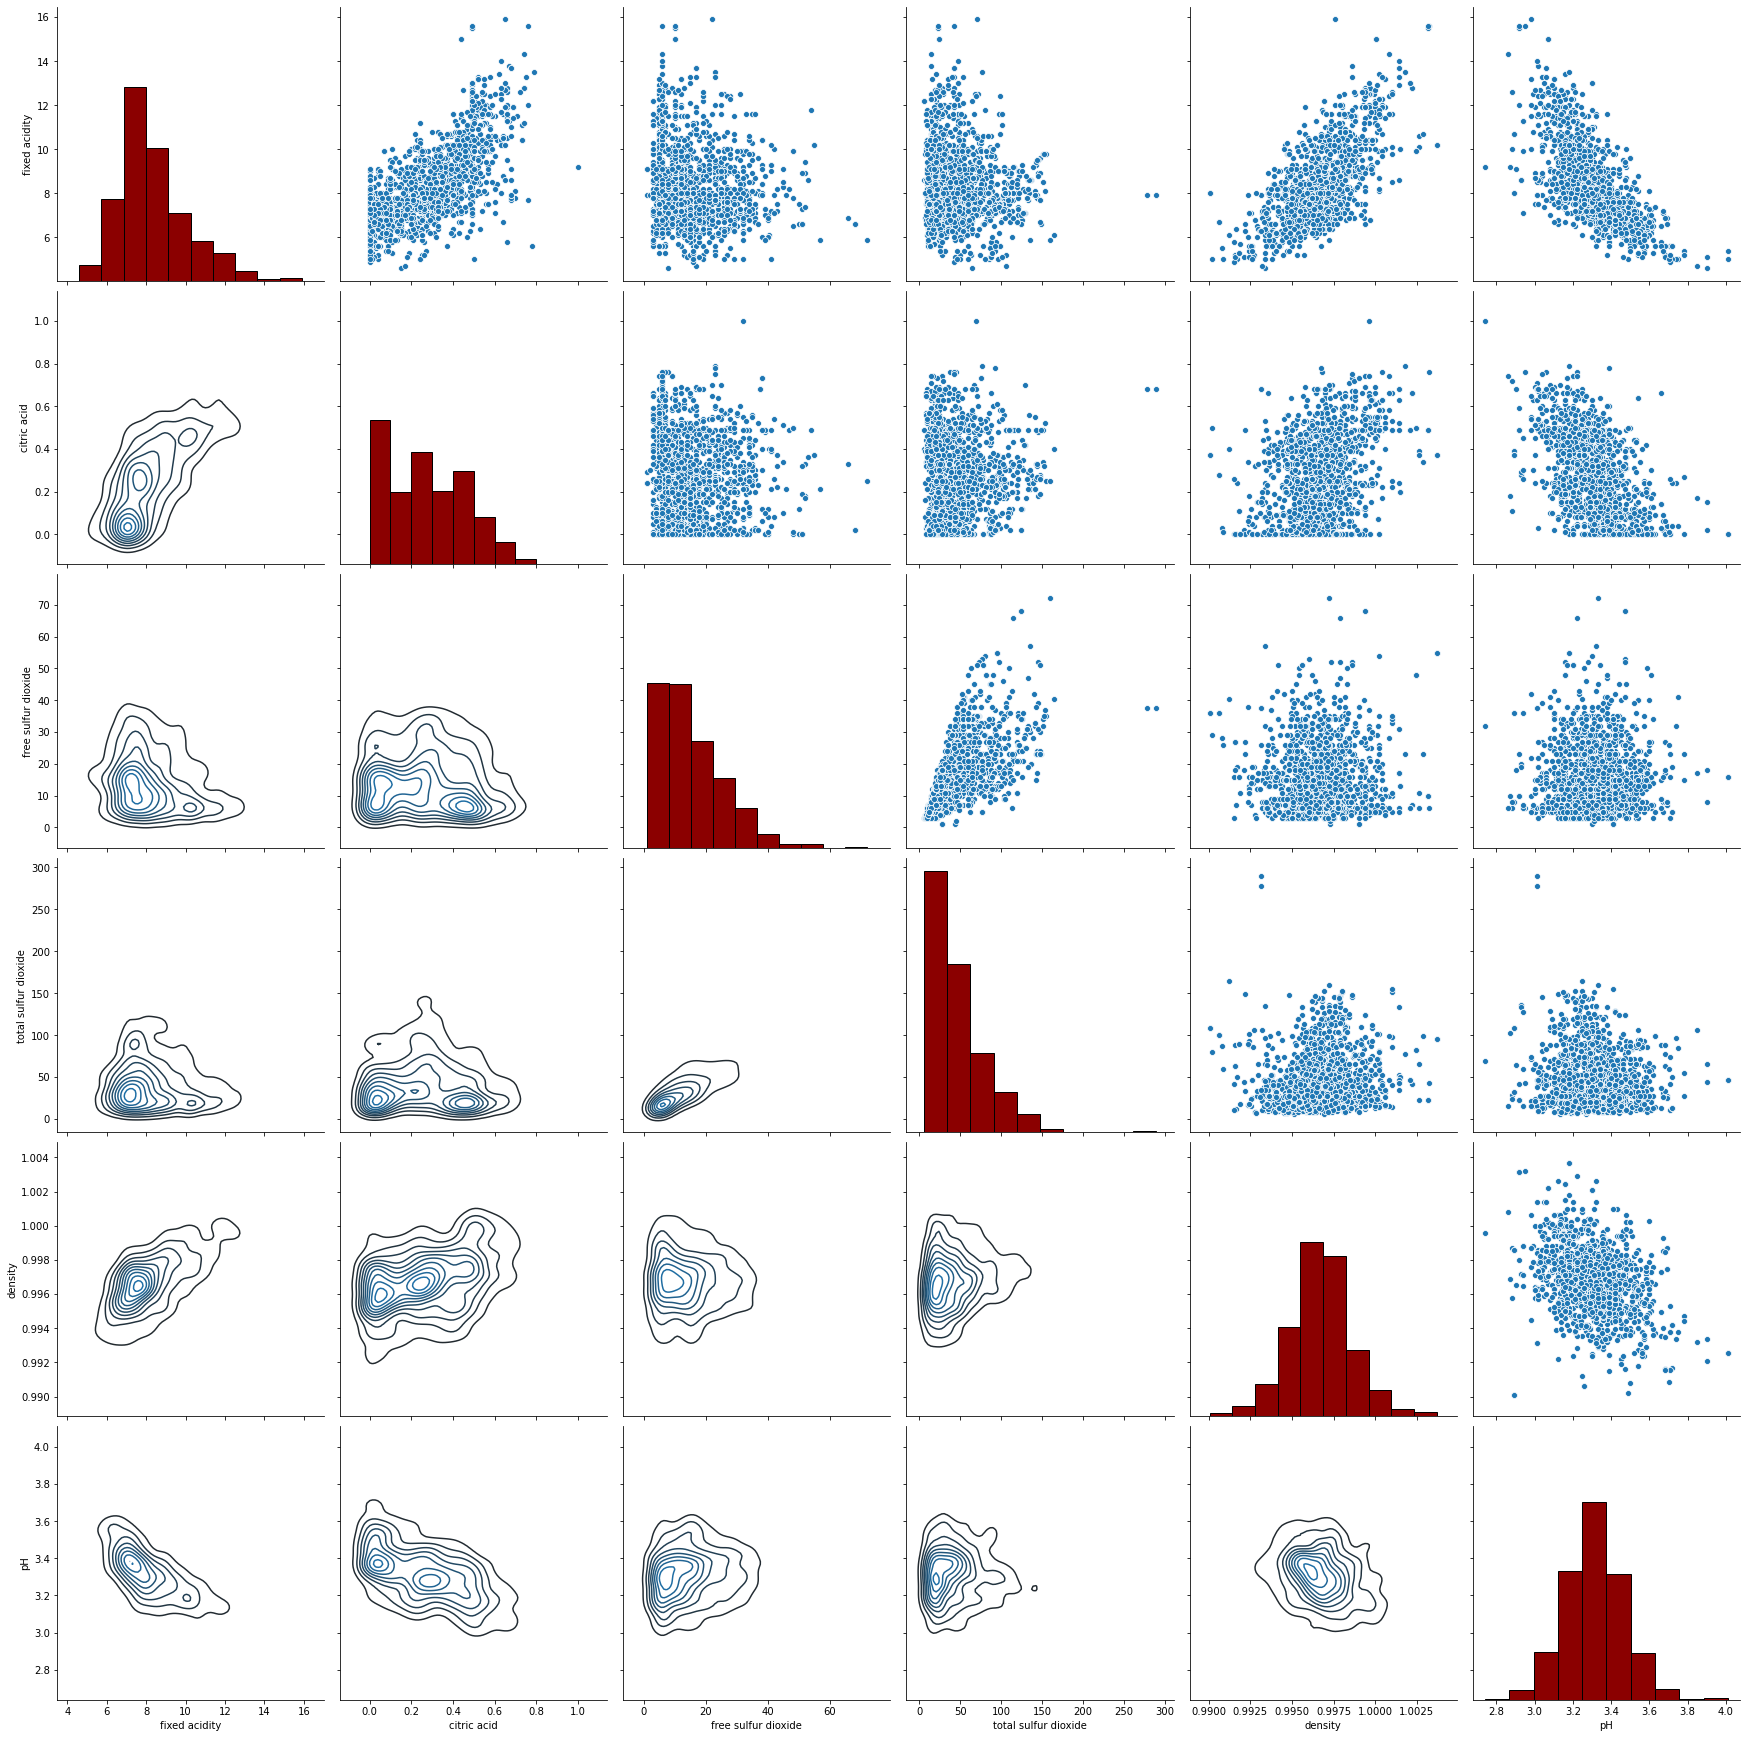

In [25]:
# Another way of visualizing pair plots for reference
grid = sns.PairGrid(data= wine_df,
                    vars = ['fixed acidity', 'citric acid', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH'], size = 4)
grid = grid.map_upper(sns.scatterplot)
grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred', edgecolor = 'k')
grid = grid.map_lower(sns.kdeplot)

#### Split the wine_df into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.

In [26]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_orig'],
      dtype='object')

In [27]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(wine_df.drop(['quality','quality_orig'],axis=1), wine_df['quality'], test_size=.3,
                                                   random_state=22)
X_train.shape,X_test.shape

((1119, 11), (480, 11))

## Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.

In [28]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 3 and size of the leaf node to 5 (no particular reason for 
# selecting this)
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [29]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

#### Print the accuracy of the model & print the confusion matrix

In [30]:
model_entropy.score(X_train, y_train)  # performance on train data
# If allow data set go to leaves then accuracy always go to 1, if change min leaf nodes then also behave similar to pruning;

1.0

In [31]:
acc = model_entropy.score(X_test, y_test)  # performance on test data
acc

0.6458333333333334

#### There is a high degree of overfitting in the model due to which the test accuracy drops drastically. This shows why decision trees are prone to overfitting. 

#### Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.

In [32]:
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=25)
clf_pruned.fit(X_train, y_train)
# Regularize or prune, max step to 3, min smaples leaf -> less than 5 data pts not split;


DecisionTreeClassifier(max_depth=3, min_samples_leaf=25, random_state=100)

## Visualizing the tree

### You might need to install pydotplus and graphviz packages for visualising the tree. 

In [33]:
#! pip install six 
# Install libraries from below if not available using pip

In [34]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

In [35]:
xvar = wine_df.drop(['quality','quality_orig'], axis=1)
feature_cols = xvar.columns
feature_cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

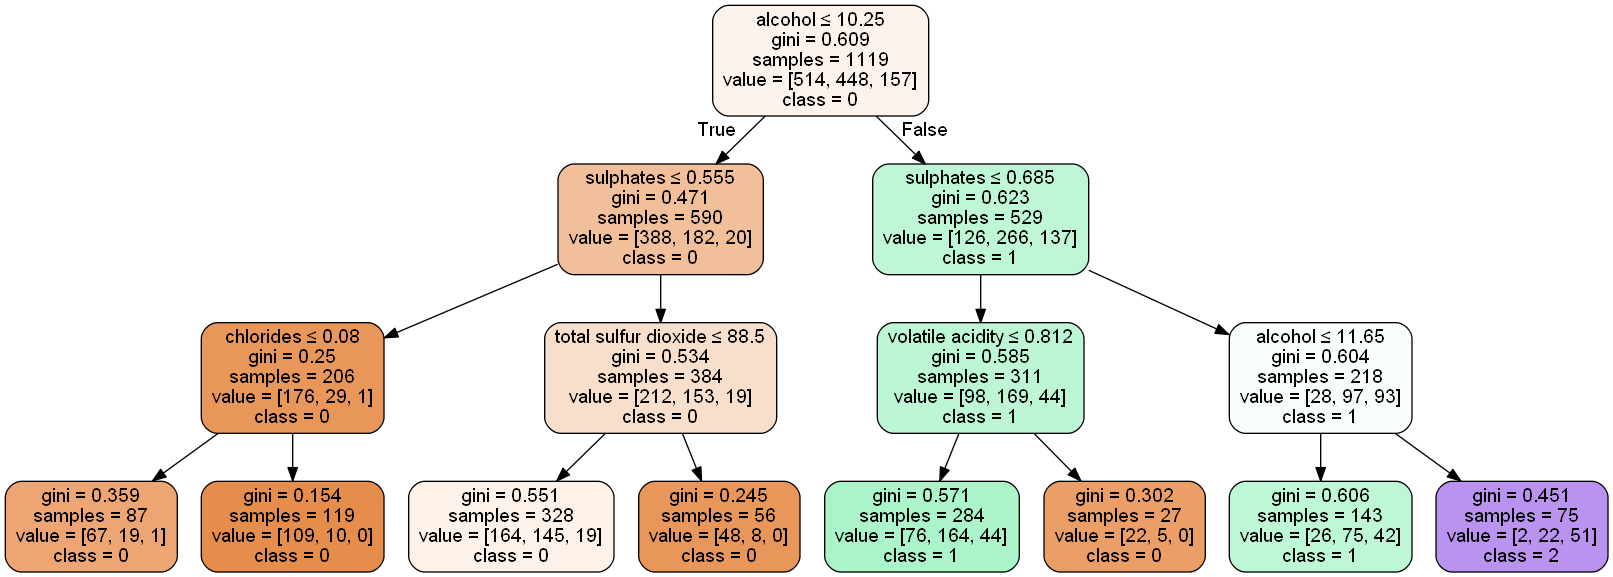

In [36]:
#Print the pruned tree
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wines_pruned.png')
Image(graph.create_png())

In [37]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [38]:
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))
# Pruning helped as test / training but perhaps getting to more underfitting now - cautious about it.


0.5958333333333333
0.6255585344057194


In [39]:
acc_DT = accuracy_score(y_test, preds_pruned)
acc_DT

0.5958333333333333

In [40]:
#Grid Search - To find the best parameters for Pruned Decision Tree
#X_train, X_test, y_train, y_test

from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(random_state = 100)
grid_values = {'criterion' : ['gini', 'entropy'],
               'splitter' : ['best', 'random'],
               'max_depth' : np.arange(3,5),
               'min_samples_leaf' : np.arange(5,8)
              }
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)
# New Model Evaluation metrics 
print('Evaluation Score : ' + str(grid_clf_acc.score(X_test,y_test)))
print('Best Parameters : ' + str(grid_clf_acc.best_params_))

acc_GS = grid_clf_acc.score(X_test,y_test)

Evaluation Score : 0.6020833333333333
Best Parameters : {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 7, 'splitter': 'random'}


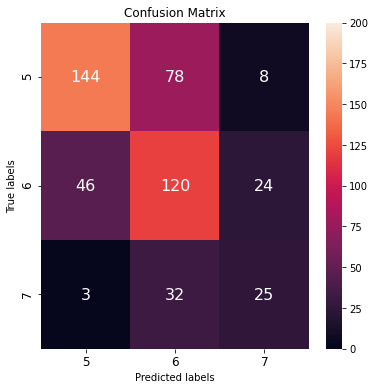

In [41]:
#Decision Tree (Grid Search) Confusion matrix
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (6,6))
sns.heatmap(confusion_matrix(y_test,y_pred_acc),annot=True,vmin=0,vmax=200,fmt='g', ax = ax,annot_kws={"size": 16})
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['5','6','7'],fontsize=12); 
ax.yaxis.set_ticklabels(['5','6','7'],fontsize=12);

In [42]:
# Another way to look at the precision - recall scores
y,levels = pd.factorize(wine_df['quality'].astype(str))
print(metrics.classification_report(y_test,y_pred_acc,target_names=levels))

              precision    recall  f1-score   support

           5       0.75      0.63      0.68       230
           6       0.52      0.63      0.57       190
           7       0.44      0.42      0.43        60

    accuracy                           0.60       480
   macro avg       0.57      0.56      0.56       480
weighted avg       0.62      0.60      0.61       480



In [43]:
# Margin of Error for overall model based on CI = critical value * standard error ( 1.96 for 95%)
from math import sqrt
interval = 1.96 * sqrt( (0.6 * (1 - 0.6)) / 480)
print(interval)
print(0.6-interval,0.6+interval)

0.04382693235899588
0.556173067641004 0.6438269323589959


### When the tree is regularised, overfitting is reduced, but there is no increase in accuracy

In [44]:
## Calculating feature importance used for interpretation

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)



,0
alcohol,0.578538
sulphates,0.255883
volatile acidity,0.080205
total sulfur dioxide,0.071859
chlorides,0.013514
fixed acidity,0.000000
citric acid,0.000000
residual sugar,0.000000
free sulfur dioxide,0.000000
density,0.000000


#### From the feature importance dataframe we can infer that alcohol, sulphate, volatile acidity and total sulfur dioxide are the variables that impact wine quality

In [45]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree','Pruned Decision Tree','Grid Search Decision Tree'], 'accuracy': [acc,acc_DT,acc_GS]})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.645833
1,Pruned Decision Tree,0.595833
2,Grid Search Decision Tree,0.602083


### We have seen decision tree in action in this session, we will explore techniques that can help us improve this model in the next sessions.

In [46]:
# You can run the model on the new data coming in every day
test = wine_df.sample(n = 10,replace=True,random_state=100).drop(['quality','quality_orig'],axis=1)
test.reset_index(inplace=True,drop=True)

In [47]:
# Make predictions based on your final mode every day
predictions = grid_clf_acc.predict(test)
pd.DataFrame(predictions)

,0
0,7
1,5
2,5
3,5
4,5
5,5
6,7
7,6
8,5
9,6


In [48]:
pd.concat([test,pd.DataFrame(predictions)], axis=1, join='inner')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,0
0,8.4,0.370,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,7
1,7.1,0.610,0.02,2.5,0.081,17.0,87.0,0.99745,3.48,0.60,9.7,5
2,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.99720,3.16,1.12,9.1,5
3,10.7,0.670,0.22,2.7,0.107,17.0,34.0,1.00040,3.28,0.98,9.9,5
4,8.6,0.380,0.36,3.0,0.081,30.0,119.0,0.99700,3.20,0.56,9.4,5
5,7.1,0.680,0.00,2.3,0.087,17.0,26.0,0.99783,3.45,0.53,9.5,5
6,5.1,0.585,0.00,1.7,0.044,14.0,86.0,0.99264,3.56,0.94,12.9,7
7,9.6,0.500,0.36,2.8,0.116,26.0,55.0,0.99722,3.18,0.68,10.9,6
8,7.6,0.540,0.13,2.5,0.097,24.0,66.0,0.99785,3.39,0.61,9.4,5
9,11.4,0.260,0.44,3.6,0.071,6.0,19.0,0.99860,3.12,0.82,9.3,6


## References -

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://www.tutorialspoint.com/scikit_learn/scikit_learn_decision_trees.htm 

https://scikit-learn.org/stable/modules/tree.html

https://towardsdatascience.com/stop-saying-precision-and-recall-to-business-leaders-f17082ab5052